In [1]:
# Malta Traffic Accident Analysis - Exploratory Data Analysis
# ICS5110 Applied Machine Learning Assignment
# Student: Naomi Thornley
# Date: January 2026

"""
This notebook explores the cleaned Malta traffic accident dataset.
I'll look at patterns, distributions, and relationships to understand:
- What factors are associated with accident severity
- Temporal patterns (time of day, day of week, season)
- Weather impacts (rain, wind, temperature)
- Geographic patterns (Malta vs Gozo, urban vs rural)
- Vehicle involvement (especially motorcycles)

This analysis will help me choose the right ML approach and
understand what features are most important.
"""

# IMPORT LIBRARIES

print("Loading libraries for EDA...")

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tests (might need these later)
from scipy import stats

# Make plots look nice
plt.style.use('default')
sns.set_palette("husl")

# Settings for better display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Make plots show up in notebook
%matplotlib inline

# Set default figure size
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries loaded!")

Loading libraries for EDA...
✅ All libraries loaded!


In [2]:
# LOAD THE CLEAN DATASET

print("="*70)
print("LOADING CLEANED DATA")
print("="*70)

# Load the ML-ready dataset I created in Notebook 1
df = pd.read_csv('data/processed/accidents_ml_ready.csv')

print(f"\n✅ Data loaded successfully!")
print(f"   Records: {len(df)}")
print(f"   Features: {len(df.columns)}")

# Quick peek at the data
print(f"\n👀 First few rows:")
print(df.head(3))

print(f"\n📋 Column names:")
print(df.columns.tolist())

LOADING CLEANED DATA

✅ Data loaded successfully!
   Records: 318
   Features: 33

👀 First few rows:
                                            title        date  \
0  Collision between motorcycle and car in Għaxaq  2025-07-30   
1                       Traffic accident in Marsa  2025-04-16   
2                       Van-car collision in Lija  2025-07-23   

                                             content  source   time  severity  \
0  Yesterday, at around 1800hrs, the Police were ...  police  18:00  grievous   
1  Yesterday, at around ten minutes to nine in th...  police  08:50  grievous   
2  Today, at around 1030hrs, the Police were info...  police  10:30   serious   

          vehicles location region  year  month day_of_week  is_weekend  \
0  motorcycle, car   Għaxaq  Malta  2025      7   Wednesday           0   
1  motorcycle, van    Marsa  Malta  2025      4   Wednesday           0   
2         car, van    Mosta  Malta  2025      7   Wednesday           0   

   has_time 

In [3]:
# BASIC DATASET OVERVIEW

print("="*70)
print("DATASET OVERVIEW")
print("="*70)

print(f"\n📊 DATASET SIZE:")
print(f"   Total accidents: {len(df)}")
print(f"   Features: {len(df.columns)}")
print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")

print(f"\n📝 DATA TYPES:")
print(df.dtypes.value_counts())

print(f"\n❓ MISSING VALUES:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(1)
missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)

if len(missing_df) > 0:
    print("\nFeatures with missing data:")
    print(missing_df)
else:
    print("   ✅ No missing values!")

print(f"\n📋 FEATURE CATEGORIES:")
print(f"   Target variable: severity, severity_binary, severity_3class")
print(f"   Temporal features: {[col for col in df.columns if col in ['time', 'hour', 'day_of_week', 'month', 'season', 'is_weekend', 'is_holiday', 'time_of_day', 'hour_category']]}")
print(f"   Location features: {[col for col in df.columns if col in ['location', 'region', 'area_type', 'has_location']]}")
print(f"   Weather features: {[col for col in df.columns if col in ['temperature', 'precipitation', 'wind_speed', 'weather_condition', 'is_rainy', 'is_foggy', 'is_windy']]}")
print(f"   Vehicle features: {[col for col in df.columns if col in ['vehicles', 'vehicle_category', 'has_motorcycle']]}")

DATASET OVERVIEW

📊 DATASET SIZE:
   Total accidents: 318
   Features: 33
   Memory usage: 1016.7 KB

📝 DATA TYPES:
object     18
int64      11
float64     4
Name: count, dtype: int64

❓ MISSING VALUES:

Features with missing data:
      Missing  Percentage
time      255        80.2
hour      255        80.2

📋 FEATURE CATEGORIES:
   Target variable: severity, severity_binary, severity_3class
   Temporal features: ['time', 'month', 'day_of_week', 'is_weekend', 'hour', 'time_of_day', 'season', 'hour_category', 'is_holiday']
   Location features: ['location', 'region', 'has_location', 'area_type']
   Weather features: ['temperature', 'precipitation', 'wind_speed', 'weather_condition', 'is_rainy', 'is_foggy', 'is_windy']
   Vehicle features: ['vehicles', 'has_motorcycle', 'vehicle_category']


In [4]:
# SUMMARY STATISTICS - NUMERICAL FEATURES

print("="*70)
print("SUMMARY STATISTICS - NUMERICAL FEATURES")
print("="*70)

# Select only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove year and weather_code (not really useful as numbers)
numerical_cols = [col for col in numerical_cols if col not in ['year', 'weather_code', 'is_weekend', 'is_holiday', 'is_rainy', 'is_foggy', 'is_windy', 'has_time', 'has_location', 'has_motorcycle']]

print(f"\n📊 Numerical features: {numerical_cols}\n")

# Get summary stats
summary = df[numerical_cols].describe()
print(summary.round(2))

# Additional stats
print(f"\n📈 Additional statistics:")
for col in numerical_cols:
    if df[col].notna().sum() > 0:
        print(f"\n{col}:")
        print(f"   Range: {df[col].min():.1f} to {df[col].max():.1f}")
        print(f"   Median: {df[col].median():.1f}")
        print(f"   Mode: {df[col].mode().values[0] if len(df[col].mode()) > 0 else 'N/A'}")
        print(f"   Std Dev: {df[col].std():.1f}")

SUMMARY STATISTICS - NUMERICAL FEATURES

📊 Numerical features: ['month', 'hour', 'temperature', 'precipitation', 'wind_speed']

        month   hour  temperature  precipitation  wind_speed
count  318.00  63.00       318.00         318.00      318.00
mean     6.49  12.86        21.24           0.84       19.91
std      3.25   5.37         5.47           4.01        8.53
min      1.00   1.00        12.00           0.00        6.10
25%      4.00   9.00        15.72           0.00       13.20
50%      7.00  12.00        21.70           0.00       18.70
75%      9.00  17.00        26.30           0.40       25.00
max     12.00  23.00        29.70          62.30       48.70

📈 Additional statistics:

month:
   Range: 1.0 to 12.0
   Median: 7.0
   Mode: 8
   Std Dev: 3.2

hour:
   Range: 1.0 to 23.0
   Median: 12.0
   Mode: 8.0
   Std Dev: 5.4

temperature:
   Range: 12.0 to 29.7
   Median: 21.7
   Mode: 27.5
   Std Dev: 5.5

precipitation:
   Range: 0.0 to 62.3
   Median: 0.0
   Mode: 0.0
  

In [5]:
# SUMMARY STATISTICS - CATEGORICAL FEATURES

print("="*70)
print("SUMMARY STATISTICS - CATEGORICAL FEATURES")
print("="*70)

# Key categorical features to analyze
categorical_features = {
    'severity': 'Accident Severity',
    'severity_binary': 'Severity (Binary)',
    'day_of_week': 'Day of Week',
    'region': 'Region',
    'weather_condition': 'Weather Condition',
    'vehicle_category': 'Vehicle Category',
    'time_of_day': 'Time of Day',
    'season': 'Season',
    'area_type': 'Area Type'
}

for col, description in categorical_features.items():
    if col in df.columns:
        print(f"\n📊 {description} ({col}):")
        counts = df[col].value_counts()
        for category, count in counts.items():
            pct = count / len(df) * 100
            print(f"   {category}: {count} ({pct:.1f}%)")

SUMMARY STATISTICS - CATEGORICAL FEATURES

📊 Accident Severity (severity):
   grievous: 156 (49.1%)
   fatal: 95 (29.9%)
   serious: 60 (18.9%)
   slight: 7 (2.2%)

📊 Severity (Binary) (severity_binary):
   high: 251 (78.9%)
   low: 67 (21.1%)

📊 Day of Week (day_of_week):
   Sunday: 51 (16.0%)
   Thursday: 50 (15.7%)
   Tuesday: 50 (15.7%)
   Wednesday: 48 (15.1%)
   Monday: 46 (14.5%)
   Saturday: 39 (12.3%)
   Friday: 34 (10.7%)

📊 Region (region):
   Malta: 264 (83.0%)
   unknown: 38 (11.9%)
   Gozo: 16 (5.0%)

📊 Weather Condition (weather_condition):
   partly_cloudy: 134 (42.1%)
   rain: 107 (33.6%)
   clear: 77 (24.2%)

📊 Vehicle Category (vehicle_category):
   other: 133 (41.8%)
   motorcycle_involved: 115 (36.2%)
   car_only: 70 (22.0%)

📊 Time of Day (time_of_day):
   unknown: 255 (80.2%)
   morning: 27 (8.5%)
   afternoon: 18 (5.7%)
   evening: 10 (3.1%)
   night: 8 (2.5%)

📊 Season (season):
   summer: 153 (48.1%)
   winter: 89 (28.0%)
   spring_autumn: 76 (23.9%)

📊 Area T

VISUALIZING TARGET VARIABLE - ACCIDENT SEVERITY


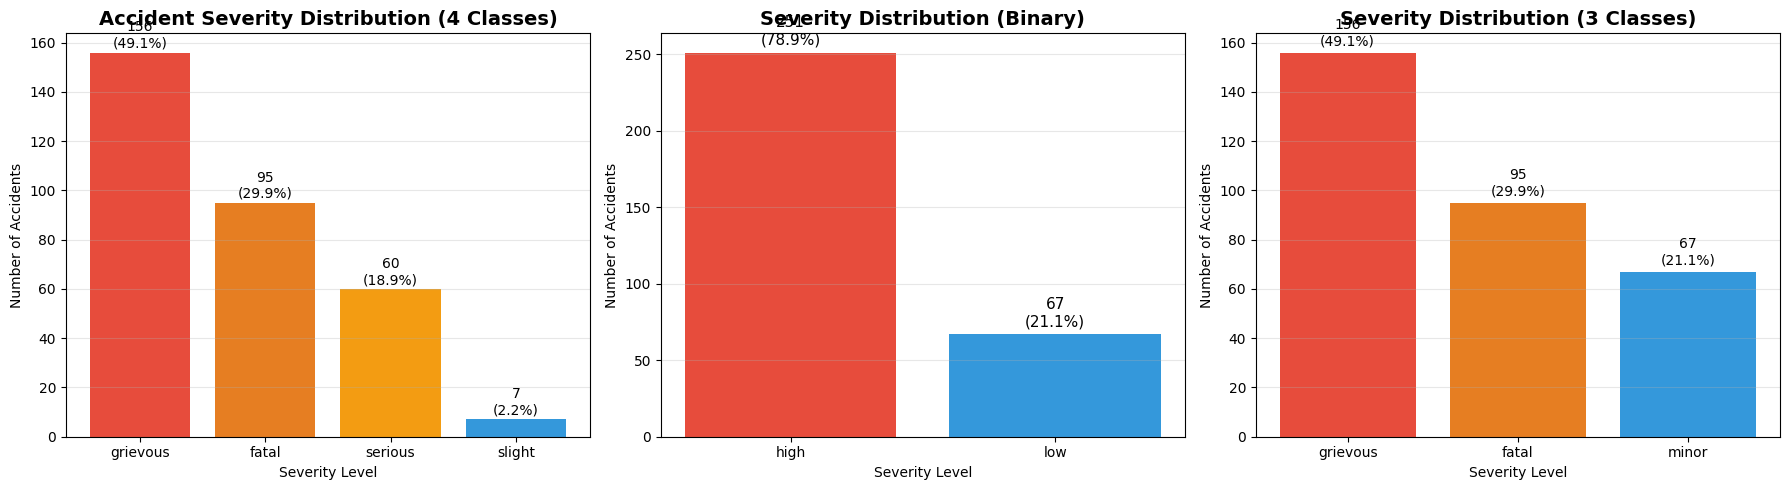


✅ Target variable visualizations created!

💡 Insights:
   - Grievous injuries are most common (49.1%)
   - Fatal accidents are 29.9% - significant!
   - Only 7 'slight' cases - too few for 4-class modeling
   - Binary classification is well-balanced (79% vs 21%)
   - Recommendation: Use binary or 3-class target for ML


In [6]:
# VISUALIZATIONS - TARGET VARIABLE (SEVERITY)

print("="*70)
print("VISUALIZING TARGET VARIABLE - ACCIDENT SEVERITY")
print("="*70)

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Original severity (4 classes)
severity_counts = df['severity'].value_counts()
axes[0].bar(severity_counts.index, severity_counts.values, color=['#e74c3c', '#e67e22', '#f39c12', '#3498db'])
axes[0].set_title('Accident Severity Distribution (4 Classes)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Severity Level')
axes[0].set_ylabel('Number of Accidents')
axes[0].grid(axis='y', alpha=0.3)

# Add counts on bars
for i, (severity, count) in enumerate(severity_counts.items()):
    pct = count / len(df) * 100
    axes[0].text(i, count + 2, f'{count}\n({pct:.1f}%)', ha='center', fontsize=10)

# Plot 2: Binary severity
binary_counts = df['severity_binary'].value_counts()
colors_binary = ['#e74c3c', '#3498db']
axes[1].bar(binary_counts.index, binary_counts.values, color=colors_binary)
axes[1].set_title('Severity Distribution (Binary)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Severity Level')
axes[1].set_ylabel('Number of Accidents')
axes[1].grid(axis='y', alpha=0.3)

# Add counts on bars
for i, (severity, count) in enumerate(binary_counts.items()):
    pct = count / len(df) * 100
    axes[1].text(i, count + 5, f'{count}\n({pct:.1f}%)', ha='center', fontsize=11)

# Plot 3: 3-class severity
class3_counts = df['severity_3class'].value_counts()
axes[2].bar(class3_counts.index, class3_counts.values, color=['#e74c3c', '#e67e22', '#3498db'])
axes[2].set_title('Severity Distribution (3 Classes)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Severity Level')
axes[2].set_ylabel('Number of Accidents')
axes[2].grid(axis='y', alpha=0.3)

# Add counts on bars
for i, (severity, count) in enumerate(class3_counts.items()):
    pct = count / len(df) * 100
    axes[2].text(i, count + 3, f'{count}\n({pct:.1f}%)', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('outputs/figures/severity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Target variable visualizations created!")
print(f"\n💡 Insights:")
print(f"   - Grievous injuries are most common (49.1%)")
print(f"   - Fatal accidents are 29.9% - significant!")
print(f"   - Only 7 'slight' cases - too few for 4-class modeling")
print(f"   - Binary classification is well-balanced (79% vs 21%)")
print(f"   - Recommendation: Use binary or 3-class target for ML")

TEMPORAL ANALYSIS - DAY OF WEEK


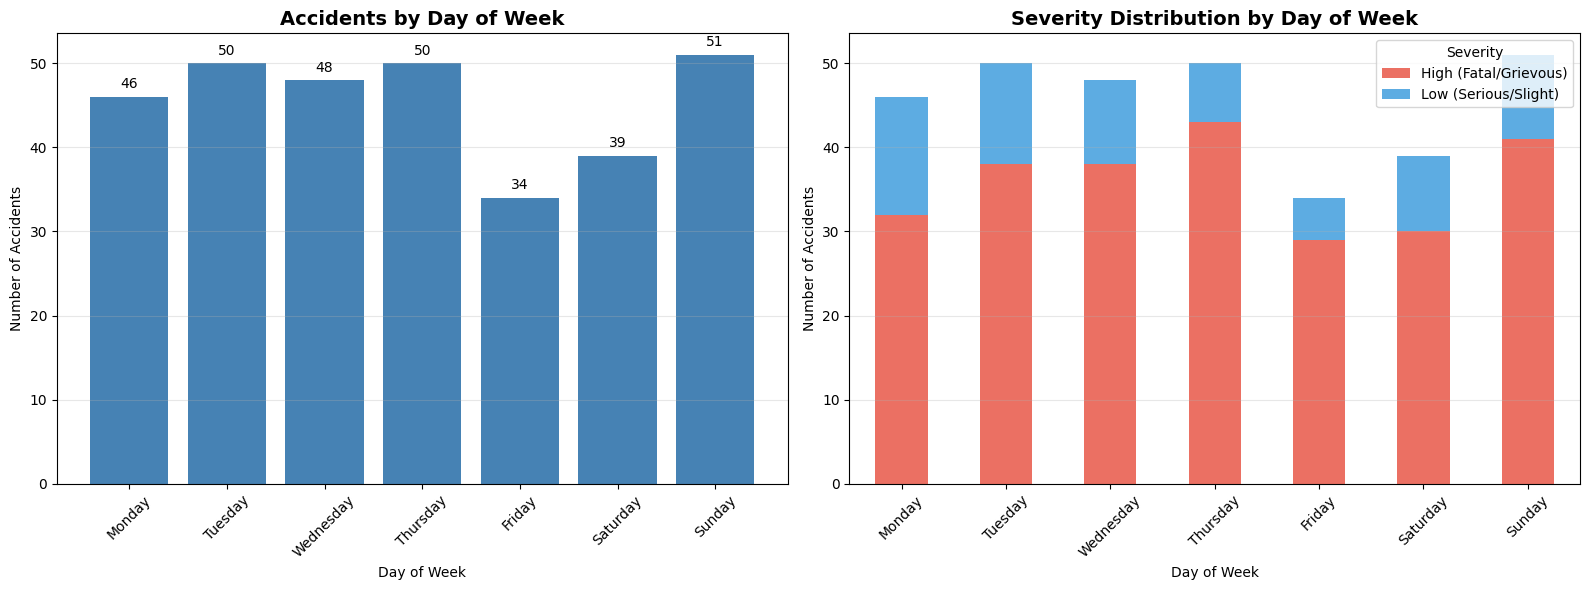


📊 Day of week statistics:
day_of_week
Monday       46
Tuesday      50
Wednesday    48
Thursday     50
Friday       34
Saturday     39
Sunday       51
Name: count, dtype: int64

📅 Weekday vs Weekend:
   Weekday: 228 (71.7%)
   Weekend: 90 (28.3%)

💡 Insights:
   - Most accidents on: Sunday (51 accidents)
   - Fewest accidents on: Friday (34 accidents)
   - 71.7% of accidents happen on weekdays


In [7]:
# TEMPORAL PATTERNS - DAY OF WEEK

print("="*70)
print("TEMPORAL ANALYSIS - DAY OF WEEK")
print("="*70)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Order days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().reindex(day_order)

# Plot 1: Total accidents by day
axes[0].bar(day_order, day_counts.values, color='steelblue')
axes[0].set_title('Accidents by Day of Week', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Number of Accidents')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add counts on bars
for i, count in enumerate(day_counts.values):
    axes[0].text(i, count + 1, str(count), ha='center', fontsize=10)

# Plot 2: Severity by day of week (stacked bar)
severity_by_day = pd.crosstab(df['day_of_week'], df['severity_binary'])
severity_by_day = severity_by_day.reindex(day_order)

severity_by_day.plot(kind='bar', stacked=True, ax=axes[1], 
                      color=['#e74c3c', '#3498db'], alpha=0.8)
axes[1].set_title('Severity Distribution by Day of Week', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Number of Accidents')
axes[1].legend(title='Severity', labels=['High (Fatal/Grievous)', 'Low (Serious/Slight)'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/figures/day_of_week_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical insight
print(f"\n📊 Day of week statistics:")
print(day_counts)

# Weekday vs Weekend
weekday_accidents = df[df['is_weekend'] == 0]
weekend_accidents = df[df['is_weekend'] == 1]

print(f"\n📅 Weekday vs Weekend:")
print(f"   Weekday: {len(weekday_accidents)} ({len(weekday_accidents)/len(df)*100:.1f}%)")
print(f"   Weekend: {len(weekend_accidents)} ({len(weekend_accidents)/len(df)*100:.1f}%)")

print(f"\n💡 Insights:")
print(f"   - Most accidents on: {day_counts.idxmax()} ({day_counts.max()} accidents)")
print(f"   - Fewest accidents on: {day_counts.idxmin()} ({day_counts.min()} accidents)")
print(f"   - {len(weekday_accidents)/len(df)*100:.1f}% of accidents happen on weekdays")